# Titanic with R_220224

## 1. Load Data

In [3]:
library('ggplot2')
#Visualization
library('ggthemes')
#Visualization
library("scales")
# visualization
library("dplyr")
#data manipulation
install.packages("mice")
library("mice")
#imputation
library("randomForest")
#Classification


  There is a binary version available but the source version is later:
     binary source needs_compilation
mice 3.13.0 3.14.0              TRUE

  Binaries will be installed
package 'mice' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\user\AppData\Local\Temp\RtmpmUeOw4\downloaded_packages


Warning message:
"package 'mice' was built under R version 3.6.3"

Attaching package: 'mice'


The following object is masked from 'package:stats':

    filter


The following objects are masked from 'package:base':

    cbind, rbind


randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:dplyr':

    combine


The following object is masked from 'package:ggplot2':

    margin




In [4]:
train <- read.csv("C:/Users/user/Desktop/데이터분석/220203 프로젝트1_titanic/train.csv")
test <-read.csv("C:/Users/user/Desktop/데이터분석/220203 프로젝트1_titanic/test.csv")

In [168]:
str(test)

'data.frame':	418 obs. of  19 variables:
 $ PassengerId: Factor w/ 1309 levels "1","2","3","4",..: 892 893 894 895 896 897 898 899 900 901 ...
 $ Survived   : int  NA NA NA NA NA NA NA NA NA NA ...
 $ Pclass     : Factor w/ 3 levels "1","2","3": 3 3 2 3 3 3 3 2 3 3 ...
 $ Name       : Factor w/ 1307 levels "Abbing, Mr. Anthony",..: 438 1298 1162 1303 1072 1259 178 949 896 994 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 2 2 1 2 1 2 1 2 ...
 $ Age        : num  34.5 47 62 27 22 14 30 26 18 21 ...
 $ SibSp      : int  0 1 0 0 1 0 0 1 0 2 ...
 $ Parch      : int  0 0 0 0 1 0 0 1 0 0 ...
 $ Ticket     : Factor w/ 929 levels "110152","110413",..: 781 841 726 776 252 869 787 159 745 520 ...
 $ Fare       : num  7.83 7 9.69 8.66 12.29 ...
 $ Cabin      : chr  "" "" "" "" ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 3 4 3 4 4 4 3 4 2 4 ...
 $ Title      : Factor w/ 5 levels "Master","Miss",..: 3 4 3 3 4 3 2 3 4 3 ...
 $ Fsize      : num  1 2 1 1 3 1 1 3 1 3 ...
 $ Fami

In [7]:
full <-bind_rows(train, test)
#Bind rows

In [12]:
head(train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [10]:
str(full)

'data.frame':	1309 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 1307 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 929 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 187 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


## 2. Feature analysis

### 2.1. Feature anaysis(Name)

### 2.1.2.Create 'Title' feature

I will make a new feature "Title" by extracting titles from individuals' name.

In [29]:
head(full)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,Mr
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,Mrs
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S,Miss
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Mrs
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,Mr
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q,Mr


In [15]:
# Grab title from passenger names
full$Title <- gsub('(.*, )|(\\..*)', '', full$Name)

# Show title counts by sex
table(full$Sex, full$Title)

        
         Capt Col Don Dona  Dr Jonkheer Lady Major Master Miss Mlle Mme  Mr Mrs
  female    0   0   0    1   1        0    1     0      0  260    2   1   0 197
  male      1   4   1    0   7        1    0     2     61    0    0   0 757   0
        
          Ms Rev Sir the Countess
  female   2   0   0            1
  male     0   8   1            0

### Put names into 'rare_title', 'Miss', 'Mrs', 'Mr'

Put rare titles(Dona', 'Lady', 'the Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer') into one feature

In [32]:
rare_title<-c('Dona', 'Lady', 'the Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer')

Reassigning Mlle, Ms, Mme, and Rare title to Miss, Mrs, Rare title

In [34]:
full$Title[full$Title=='Mlle'] <-'Miss'
full$Title[full$Title=='Ms'] <-'Miss'
full$Title[full$Title=='Mme'] <-'Mrs'
full$Title[full$Title %in% rare_title] <-'Rare title'

Check the changed features

In [35]:
table(full$Sex, full$Title)

        
         Master Miss  Mr Mrs Rare title
  female      0  264   0 198          4
  male       61    0 757   0         25

In [60]:
full$Surname <- sapply(full$Name,  
                      function(x) strsplit(x, split = '[,.]')[[1]][1])

ERROR: Error in strsplit(x, split = "[,.]"): 문자형을 가지지 않는 인자입니다


### 2.2. Feature anaysis(Familiy Size)

#### 2.2.1 Create FamilySize(Fsize) feature

Create a family size varaible(+1 to include the passenger themselves)

In [49]:
full$Fsize<-full$SibSp+full$Parch+1

In [51]:
str(full$Fsize)

 num [1:1309] 2 2 1 2 1 1 1 5 3 2 ...


In [65]:
full$Family <- paste(full$Title, full$Fsize, sep='_')

In [66]:
head(full)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Family
,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>,<chr>,<dbl>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,Mr,2,Mr_2
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,Mrs,2,Mrs_2
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S,Miss,1,Miss_1
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Mrs,2,Mrs_2
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,Mr,1,Mr_1
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q,Mr,1,Mr_1


#### 2.2.2.Analyze relationship between survival and Family Size

Use ggplot2 to visualize the relationship between Family Size and Survival

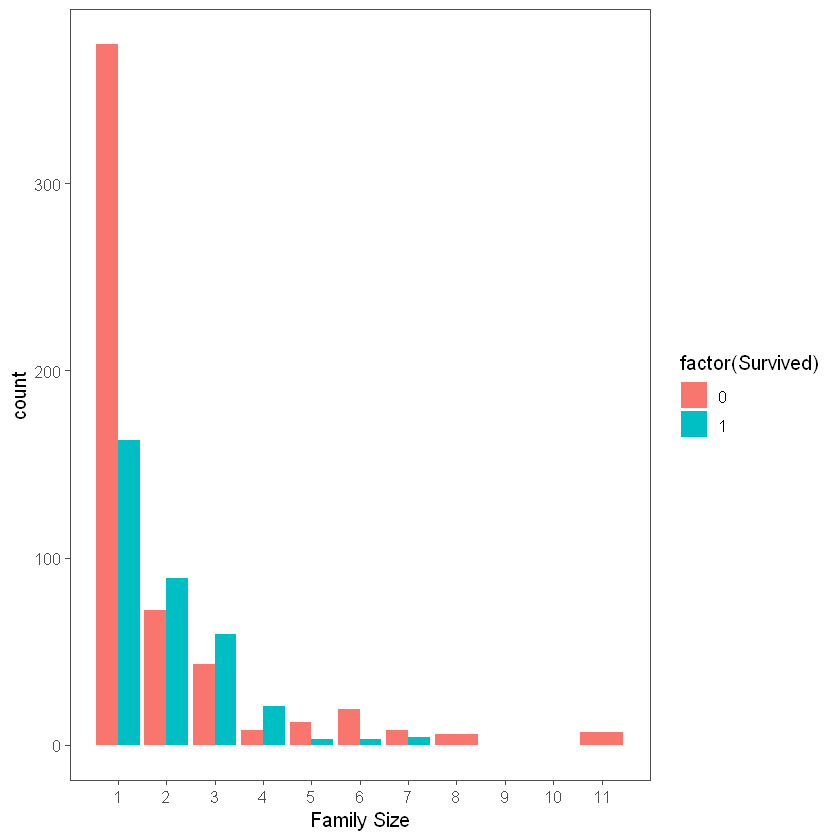

In [67]:
ggplot(full[1:891,], aes(x=Fsize, fill=factor(Survived)))+geom_bar(stat='count', position='dodge')+
scale_x_continuous(breaks=c(1:11))+labs(x='Family Size')+theme_few()

(1) Many without companies died.

(2)Having over 4 members negatively affected survival rate

#### 2.2.3. Creating discrete family size

In [69]:
full$FsizeD[full$Fsize==1]<-'single passenger'
full$FsizeD[full$Fsize<5 & full $ Fsize>1]<-'passengers with 1-4 companies'
full$FsizeD[full$Fsize>4]<-'passengers with over 5 companies'


Showing family size-survival relationsip with a mosaic plot

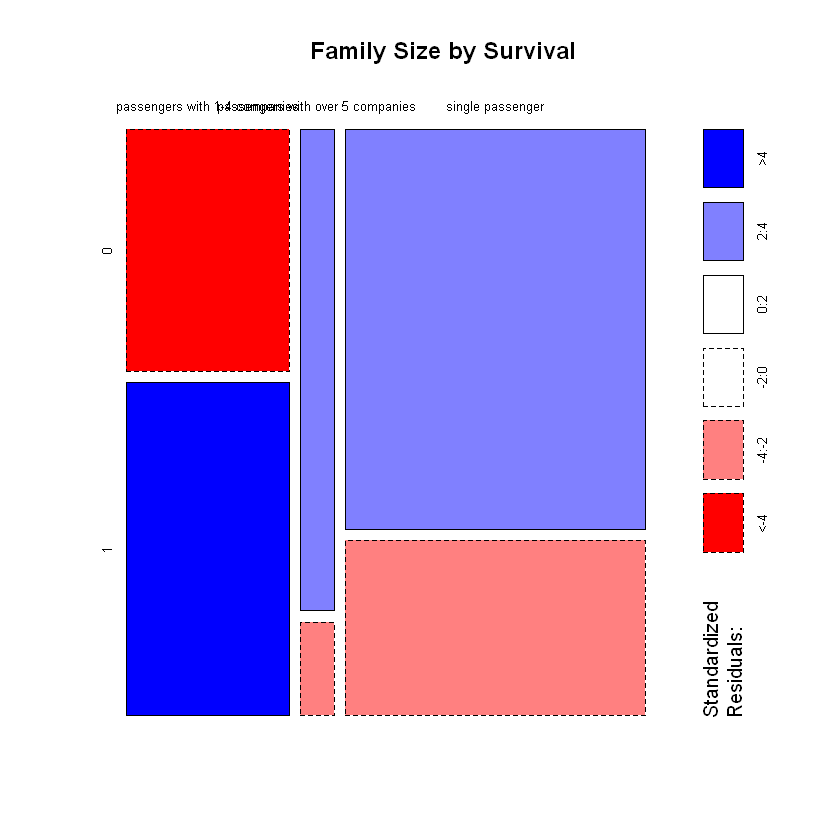

In [78]:
mosaicplot(table(full$FsizeD, full$Survived), main='Family Size by Survival', shade=T)

### Filling NaN values

In [86]:
full$Cabin <- as.character(full$Cabin)

In [87]:
full$Cabin[1:28]

[1] ""            "C85"         ""            "C123"        ""           
 [6] ""            "E46"         ""            ""            ""           
[11] "G6"          "C103"        ""            ""            ""           
[16] ""            ""            ""            ""            ""           
[21] ""            "D56"         ""            "A6"          ""           
[26] ""            ""            "C23 C25 C27"

In [88]:
full$Deck<-factor(sapply(full$Cabin, function(x) strsplit(x, NULL)[[1]][1]))

Passengers 62 and 830 are missing Embarkment

In [113]:
head(full[c(62, 830)])

ERROR: Error in `[.data.frame`(full, c(62, 830)): undefined columns selected


In [118]:
full[830, ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Family,FsizeD,Deck
,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<fct>
830,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,,Mrs,1,Mrs_1,single passenger,B


In [117]:
full[62, ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Family,FsizeD,Deck
,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<fct>
62,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,,Miss,1,Miss_1,single passenger,B


In [107]:
embark_fare<-full %>% filter(PassengerId != 62 & PassengerId != 830)

Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."


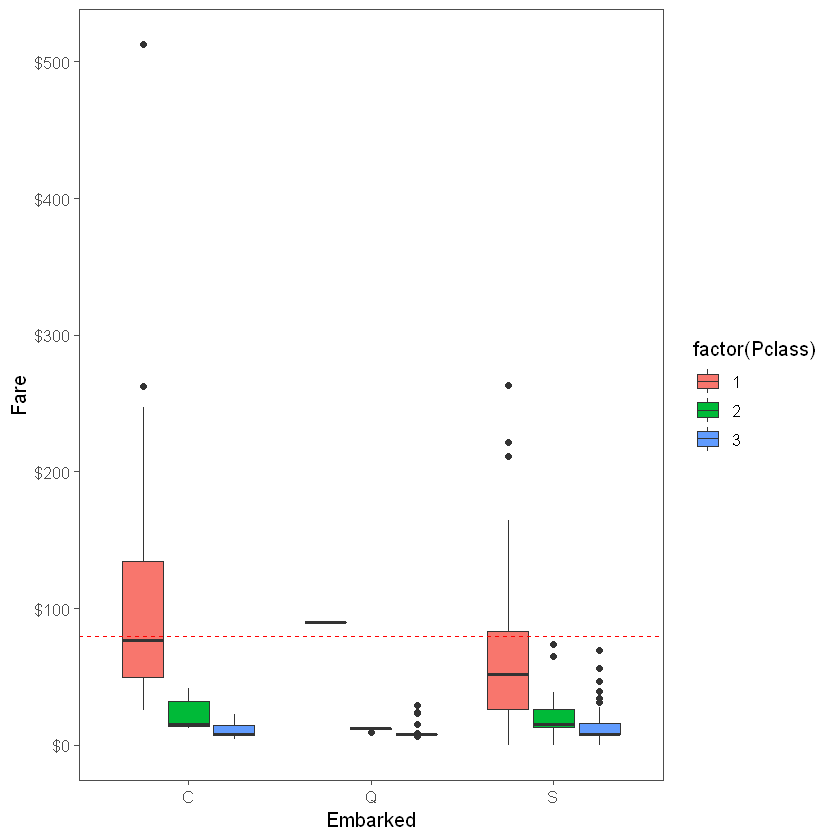

In [109]:
ggplot(embark_fare, aes(x=Embarked, y=Fare, fill=factor(Pclass)))+ geom_boxplot()+
geom_hline(aes(yintercept=80), colour='red', linetype='dashed')+
scale_y_continuous(labels=dollar_format())+
theme_few()

passenger 62 ad 830 fare was $80 for 1st class, they most likely embarked from 'C'.
Therefore, I will full 'C' for the null data.


In [119]:
full$Embarked[c(62, 830)] <- 'C'

Passenger 1044 also has NA value for Fare.

In [115]:
full[1044, ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Family,FsizeD,Deck
,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<fct>
1044,1044,NA,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NA,,S,Mr,1,Mr_1,single passenger,NA


Passenger 1044 is a  third class passenger who departed from Southampton (‘S’).

So what is the meidan value of Fare for those who is a third class passenger and departed from Southampton (‘S’)?

In [134]:
median(full[full$Pclass == '3' & full$Embarked == 'S', ]$Fare, na.rm = TRUE)

[1] 8.05

Median value of Fare for those who is a third class passenger and departed from Southampton (‘S’) is $8.05.

Visualization

Warning message:
"Removed 1 rows containing non-finite values (stat_density)."


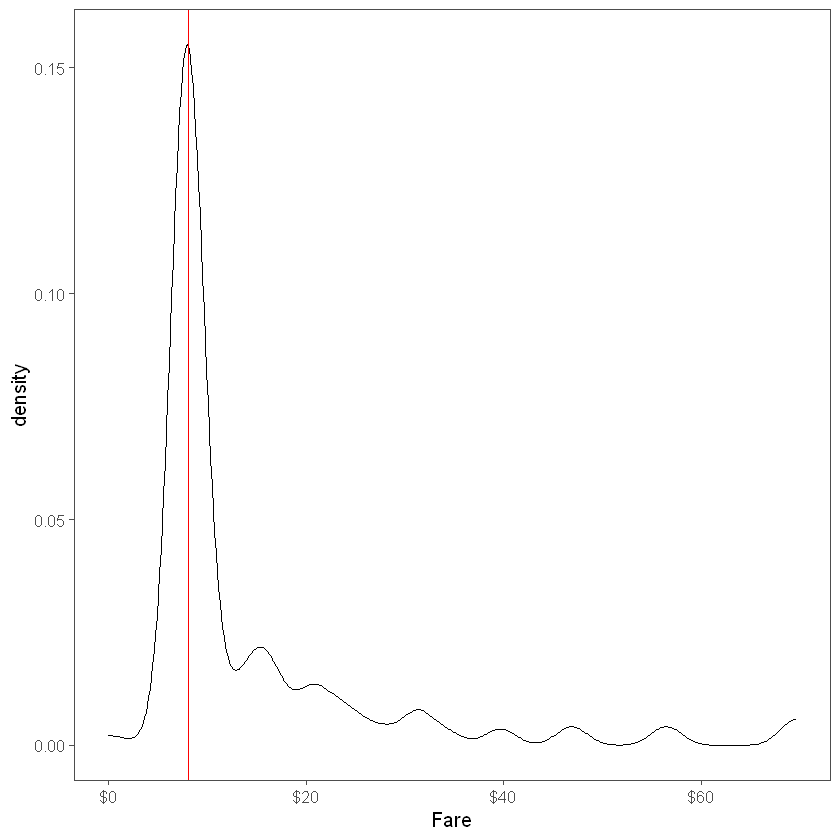

In [128]:
ggplot(full[full$Pclass == '3' & full$Embarked == 'S', ], 
  aes(x = Fare)) +
  geom_density() + 
  geom_vline(aes(xintercept=median(Fare, na.rm=T)),
    colour='red') +
  scale_x_continuous(labels=dollar_format()) +
  theme_few()


In [ ]:
# Replace missing fare value with median fare with $8.05
full$Fare[1044] <- median(full[full$Pclass == '3' & full$Embarked == 'S', ]$Fare, na.rm = TRUE)

### 2.2. Feature anaysis(Age)

### Filling NaN values

In [135]:
# Show number of missing Age values
sum(is.na(full$Age))

[1] 263

In [143]:
head(full)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Family,FsizeD,Deck
,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<fct>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,Mr,2,Mr_2,passengers with 1-4 companies,NA
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,Mrs,2,Mrs_2,passengers with 1-4 companies,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S,Miss,1,Miss_1,single passenger,NA
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Mrs,2,Mrs_2,passengers with 1-4 companies,C
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,Mr,1,Mr_1,single passenger,NA
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q,Mr,1,Mr_1,single passenger,NA


In [142]:
colnames(full)

[1] "PassengerId" "Survived"    "Pclass"      "Name"        "Sex"        
 [6] "Age"         "SibSp"       "Parch"       "Ticket"      "Fare"       
[11] "Cabin"       "Embarked"    "Title"       "Fsize"       "Family"     
[16] "FsizeD"      "Deck"

In [144]:
# Make all variables factors into united factors
factor_vars <- c('PassengerId','Pclass','Sex','Embarked','Title','Family','FsizeD')
full[factor_vars] <- lapply(full[factor_vars], function(x) as.factor(x))

In [147]:
# Set a random seed
set.seed(1)

In [148]:
# Perform mice imputation, excluding certain less-than-useful variables:
mice_mod <- mice(full[, !names(full) %in% 
                      c('PassengerId','Name','Ticket','Cabin','Family','Survived')],
                 method='rf') 


 iter imp variable
  1   1  Age  Fare  Deck
  1   2  Age  Fare  Deck
  1   3  Age  Fare  Deck
  1   4  Age  Fare  Deck
  1   5  Age  Fare  Deck
  2   1  Age  Fare  Deck
  2   2  Age  Fare  Deck
  2   3  Age  Fare  Deck
  2   4  Age  Fare  Deck
  2   5  Age  Fare  Deck
  3   1  Age  Fare  Deck
  3   2  Age  Fare  Deck
  3   3  Age  Fare  Deck
  3   4  Age  Fare  Deck
  3   5  Age  Fare  Deck
  4   1  Age  Fare  Deck
  4   2  Age  Fare  Deck
  4   3  Age  Fare  Deck
  4   4  Age  Fare  Deck
  4   5  Age  Fare  Deck
  5   1  Age  Fare  Deck
  5   2  Age  Fare  Deck
  5   3  Age  Fare  Deck
  5   4  Age  Fare  Deck
  5   5  Age  Fare  Deck


Warning message:
"Number of logged events: 75"


In [149]:
# Save the complete output 
mice_output <- complete(mice_mod)

compare the results I got with the original distribution of passenger ages

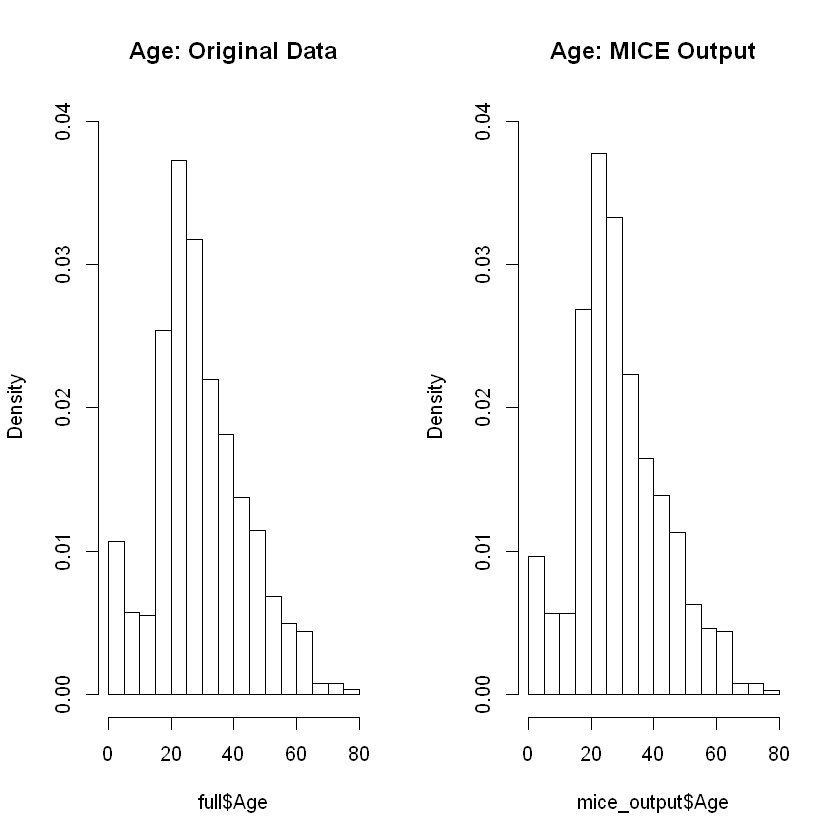

In [151]:
par(mfrow=c(1,2))
hist(full$Age, freq=F, main='Age: Original Data', ylim=c(0,0.04))
hist(mice_output$Age, freq=F, main='Age: MICE Output', ylim=c(0,0.04))

In [152]:
# Replace Age variable from the mice model.
full$Age <- mice_output$Age

# Show new number of missing Age values
sum(is.na(full$Age))

[1] 0

### 2.2. Feature anaysis(Being a mother)

Is being a mother changes survival rate?

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



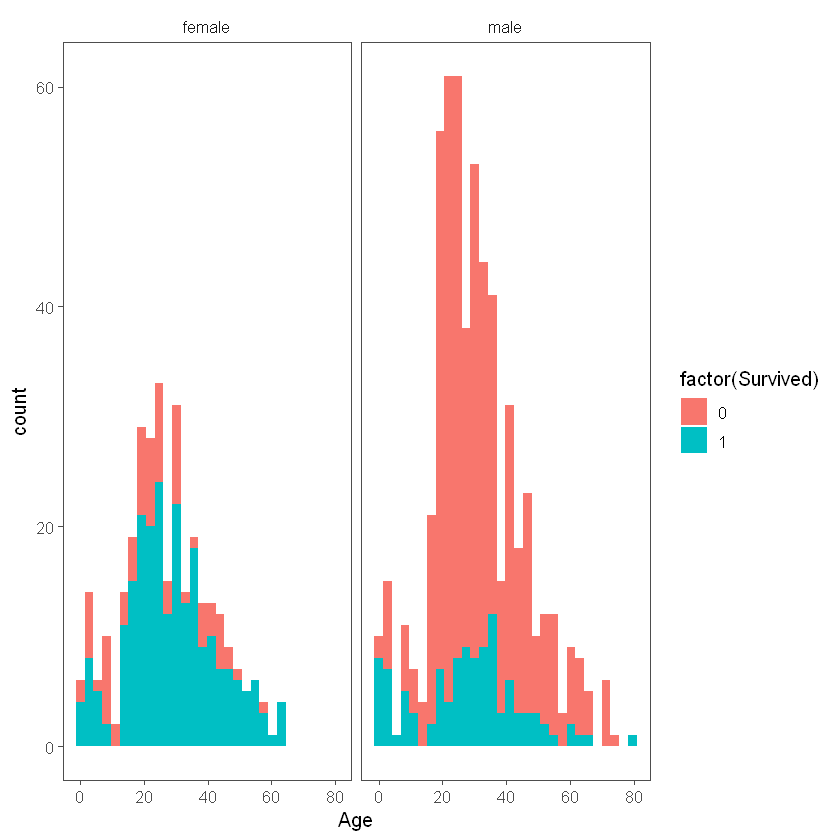

In [154]:
# Firstlook at the relationship between age & survival
ggplot(full[1:891,], aes(Age, fill = factor(Survived))) + 
  geom_histogram() + 
  # I include Sex since we know (a priori) it's a significant predictor
  facet_grid(.~Sex) + 
  theme_few()

In [160]:
# Create the column showing whether a apssenger is a child or adult
full$Child[full$Age < 18] <- 'Child'
full$Child[full$Age >= 18] <- 'Adult'

In [161]:
# Show counts
table(full$Child, full$Survived)

       
          0   1
  Adult 480 271
  Child  69  71

Let's create a Mother variable.

In [162]:
# Adding Mother variable(a gir who has at least one Parents or childre, who is older than 18, who is not a Miss)
full$Mother <- 'Not Mother'
full$Mother[full$Sex == 'female' & full$Parch > 0 & full$Age > 18 & full$Title != 'Miss'] <- 'Mother'

# Show counts
table(full$Mother, full$Survived)

            
               0   1
  Mother      16  39
  Not Mother 533 303

In [163]:
# Finish by factorizing two new factor variables
full$Child  <- factor(full$Child)
full$Mother <- factor(full$Mother)

In [164]:
head(full)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Family,FsizeD,Deck,Child,Mother
,<fct>,<int>,<fct>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<chr>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,Mr,2,Mr_2,passengers with 1-4 companies,NA,Adult,Not Mother
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,Mrs,2,Mrs_2,passengers with 1-4 companies,C,Adult,Not Mother
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S,Miss,1,Miss_1,single passenger,NA,Adult,Not Mother
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Mrs,2,Mrs_2,passengers with 1-4 companies,C,Adult,Not Mother
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,Mr,1,Mr_1,single passenger,NA,Adult,Not Mother
6,6,0,3,"Moran, Mr. James",male,21,0,0,330877,8.4583,,Q,Mr,1,Mr_1,single passenger,NA,Adult,Not Mother


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,Title,Fsize,Family,FsizeD,Child,Mother,Fare,Survived,Deck,
204,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
687,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
91,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
326,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,2
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,3
,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,418,1014,1433


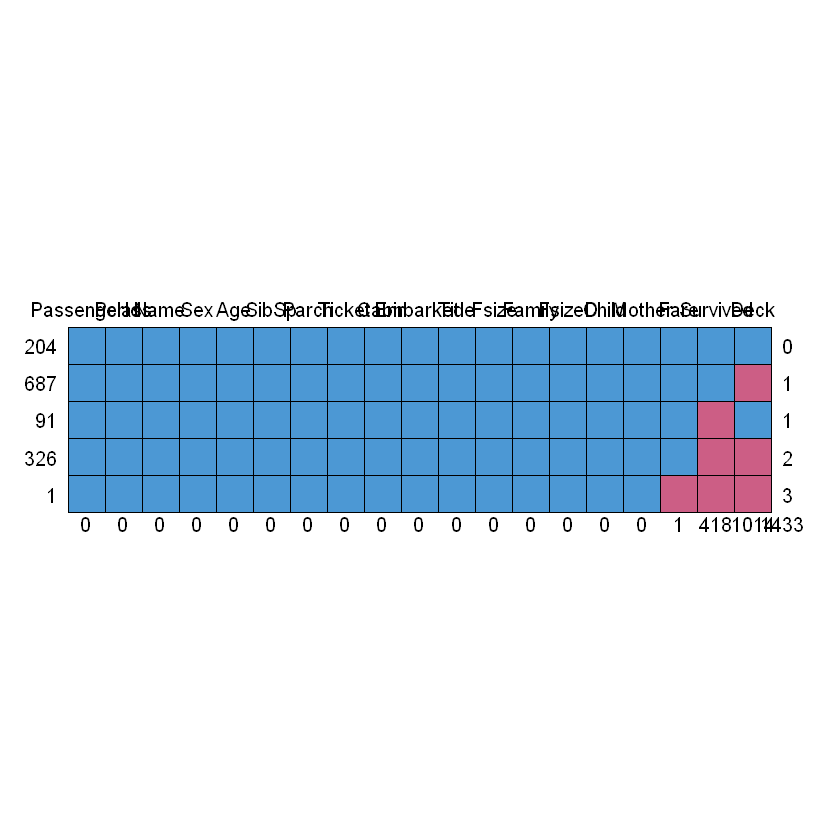

In [165]:
md.pattern(full)

### 3. Prediction

#### 3.1. Spliting training and test data

original test set(have891 obs.) and training sets(have 418 obs.)

In [166]:
train <- full[1:891,]
test <- full[892:1309,]

#### 3.2 Using RandomForest Model

In [169]:
# Set a random seed
set.seed(754)

In [170]:
# Build the model (not all variables need to be used)
rf_model <- randomForest(factor(Survived) ~ Pclass + Sex + Age + SibSp + Parch + 
                                            Fare + Embarked + Title + 
                                            FsizeD + Child + Mother,
                                            data = train)

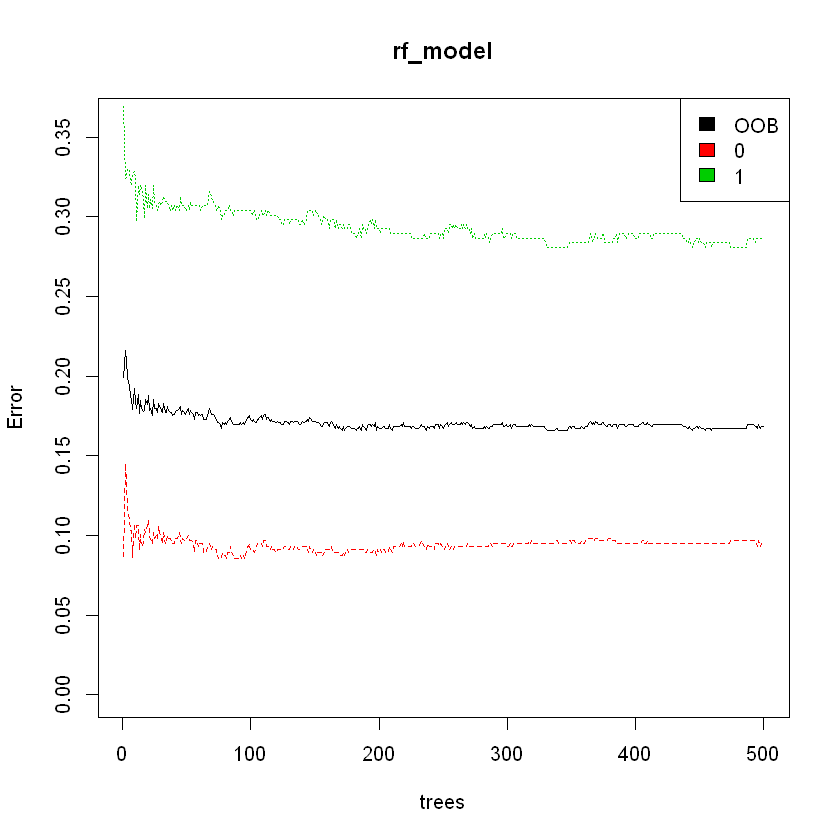

In [171]:
# Show model error
plot(rf_model, ylim=c(0,0.36))
legend('topright', colnames(rf_model$err.rate), col=1:3, fill=1:3)

black line: the overall error rate which falls below 20%. 

red line: the error rate for ‘died'

green line: the error rate for ‘survived'

Since the red line is lower than the green line, the error rate for ‘died' is lower than the error rate for ‘survived.' So the model is more successful predicting death than survival.

## 4. Feature importance

In [208]:
# Get importance
importance    <- importance(rf_model)
varImportance <- data.frame(Variables = row.names(importance), 
                            Importance = round(importance[ ,'MeanDecreaseGini'],2))


In [209]:

# Create a rank variable based on importance
rankImportance <- varImportance %>%
  mutate(Rank = paste0('#',dense_rank(desc(Importance))))


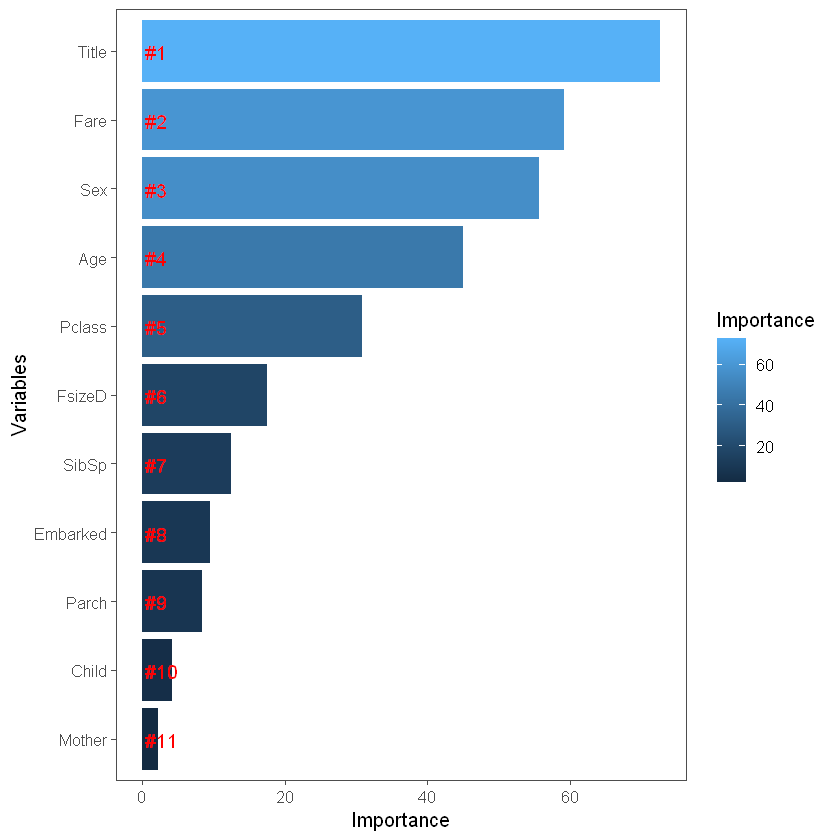

In [210]:

# Use ggplot2 to visualize the relative importance of variables
ggplot(rankImportance, aes(x = reorder(Variables, Importance), 
    y = Importance, fill = Importance)) +
  geom_bar(stat='identity') + 
  geom_text(aes(x = Variables, y = 0.5, label = Rank),
    hjust=0, vjust=0.55, size = 4, colour = 'red') +
  labs(x = 'Variables') +
  coord_flip() + 
  theme_few()

## Prediction

In [218]:
# Predict using the test set
prediction <- predict(rf_model, test)

# Save the solution to a dataframe with two columns: PassengerId and Survived (prediction)
solution <- data.frame(PassengerID = test$PassengerId, Survived = prediction)

# Write the solution to file
write.csv(solution, file = 'rf_mod_Solution.csv', row.names = F)

ERROR: Error in data.frame(PassengerID = test$PassengerId, Survived = prediction): row names contain missing values


In [219]:
which(is.na(prediction))

<NA> 
 153

In [221]:
test[153,]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Family,FsizeD,Deck,Child,Mother
,<fct>,<int>,<fct>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<chr>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
1044,1044,NA,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NA,,S,Mr,1,Mr_1,single passenger,NA,Adult,Not Mother


Pclass3, male, aged 60.5; therefore, likely have died.

In [237]:
prediction[153]<-0

In [238]:
prediction[152]

1043 
   0 
Levels: 0 1

In [223]:
head(prediction)

892 893 894 895 896 897 
  0   0   0   0   1   0 
Levels: 0 1

In [225]:
rm(prediction[153])

ERROR: Error in rm(prediction[153]): ... must contain names or character strings
